In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [ ]:
# Read the CSV files
deposit_rate_df = pd.read_csv("/content/Deposit rate.csv", parse_dates=["Date"], dayfirst=False)
gbp_exchange_rates_df = pd.read_csv("/content/GBP_ExchangeRates_Daily.csv", parse_dates=["Date"], dayfirst=False)

# Convert both date columns to a consistent format (YYYY-MM-DD)
deposit_rate_df["Date"] = pd.to_datetime(deposit_rate_df["Date"]).dt.strftime("%Y-%m-%d")
gbp_exchange_rates_df["Date"] = pd.to_datetime(gbp_exchange_rates_df["Date"]).dt.strftime("%Y-%m-%d")

# Merge datasets on the 'Date' column
merged_df = pd.merge(deposit_rate_df, gbp_exchange_rates_df, on="Date", how="inner")

# Display the first few rows of the merged dataset
print(merged_df.head())

         Date  Deposit rate  GBP_EUR  GBP_USD  GBP_HKD  GBP_JPY
0  2015-01-01          0.48   1.2875   1.5586  12.0859  186.630
1  2015-01-02          0.53   1.2772   1.5328  11.8890  184.698
2  2015-01-05          0.53   1.2779   1.5250  11.8271  182.437
3  2015-01-06          0.53   1.2743   1.5151  11.7488  179.374
4  2015-01-07          0.53   1.2763   1.5110  11.7181  180.201


In [ ]:
merged_df.head()

,Date,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY
0,2015-01-01,0.48,1.2875,1.5586,12.0859,186.630
1,2015-01-02,0.53,1.2772,1.5328,11.8890,184.698
2,2015-01-05,0.53,1.2779,1.5250,11.8271,182.437
3,2015-01-06,0.53,1.2743,1.5151,11.7488,179.374
4,2015-01-07,0.53,1.2763,1.5110,11.7181,180.201


In [ ]:
merged_df.tail()

,Date,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY
2604,2024-12-25,NaN,1.2067,1.2561,9.7552,197.050
2605,2024-12-26,NaN,1.2019,1.2525,9.7302,197.904
2606,2024-12-27,NaN,1.2064,1.2578,9.7649,198.526
2607,2024-12-30,NaN,1.2061,1.2550,9.7483,196.846
2608,2024-12-31,NaN,1.2085,1.2516,9.7212,196.764


In [ ]:
# Remove rows with NaN values
merged_df = merged_df.dropna()

In [ ]:
merged_df.shape

(2380, 6)

In [ ]:
merged_df.tail()

,Date,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY
2378,2024-02-13,5.23,1.1760,1.2592,9.8466,189.906
2379,2024-02-14,5.24,1.1713,1.2566,9.8249,189.219
2380,2024-02-15,5.24,1.1696,1.2600,9.8526,188.911
2381,2024-02-16,5.24,1.1692,1.2602,9.8559,189.269
2382,2024-02-19,5.24,1.1686,1.2594,9.8512,189.090


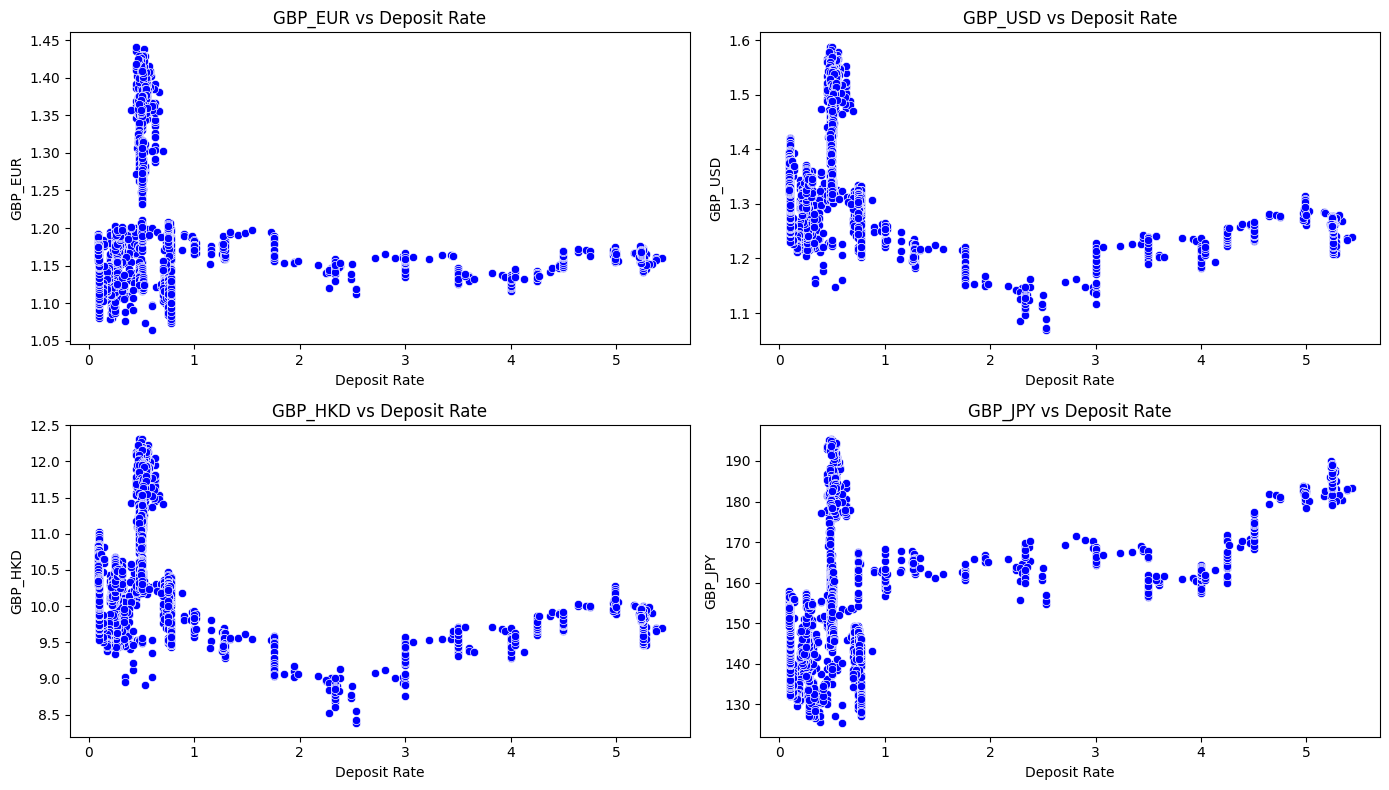

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of currency columns
currency_columns = ['GBP_EUR', 'GBP_USD', 'GBP_HKD', 'GBP_JPY']

# Create scatter plots for each currency vs. deposit rate
plt.figure(figsize=(14, 8))
for i, currency in enumerate(currency_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=merged_df['Deposit rate'], y=merged_df[currency], color='blue')
    plt.title(f'{currency} vs Deposit Rate')
    plt.xlabel('Deposit Rate')
    plt.ylabel(currency)

plt.tight_layout()
plt.show()

              Deposit rate   GBP_EUR   GBP_USD   GBP_HKD   GBP_JPY
Deposit rate      1.000000 -0.119595 -0.393519 -0.379120  0.534827
GBP_EUR          -0.119595  1.000000  0.789778  0.784356  0.680680
GBP_USD          -0.393519  0.789778  1.000000  0.998328  0.437520
GBP_HKD          -0.379120  0.784356  0.998328  1.000000  0.449193
GBP_JPY           0.534827  0.680680  0.437520  0.449193  1.000000


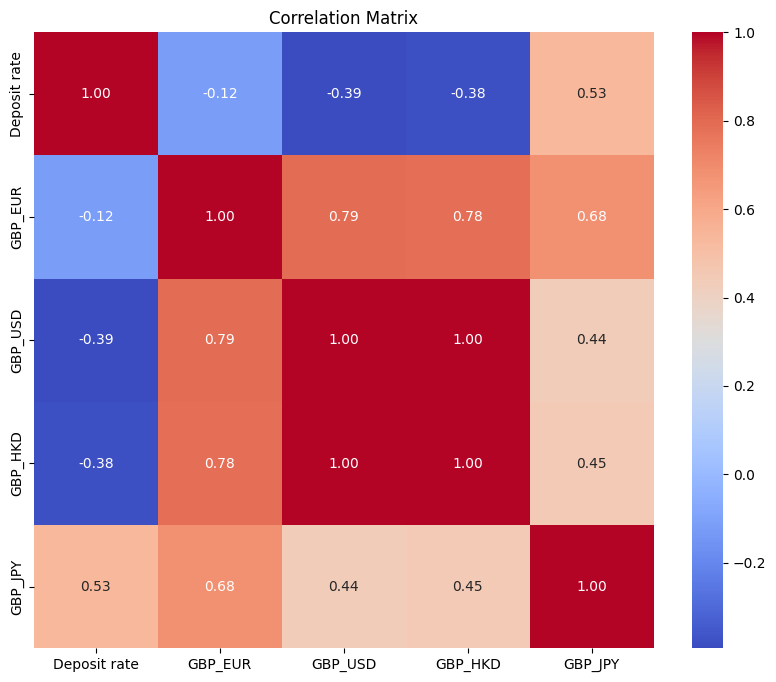

In [ ]:
# Compute correlation matrix
correlation_matrix = merged_df[['Deposit rate', 'GBP_EUR', 'GBP_USD', 'GBP_HKD', 'GBP_JPY']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Load the csv file
file_path_UN = '/content/Unemployment rate.csv'

df_UN= pd.read_csv(file_path_UN)
# Load the csv file

file_path_PI = '/content/Daily UKRPI INDEX- inflation(Sheet1).csv'

df_PI= pd.read_csv(file_path_PI)

file_path_GDP = '/content/GDP per capita.csv'

df_GDP= pd.read_csv(file_path_GDP)

In [ ]:
# Ensure 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Resample daily data to monthly by taking the mean
df_daily_monthly = merged_df.resample('M', on='Date').mean().reset_index()

print(df_daily_monthly)

          Date  Deposit rate   GBP_EUR   GBP_USD    GBP_HKD     GBP_JPY
0   2015-01-31      0.560000  1.304082  1.515968  11.752982  179.392364
1   2015-02-28      0.556500  1.350690  1.533470  11.892645  182.149950
2   2015-03-31      0.536364  1.382536  1.496914  11.614068  180.180045
3   2015-04-30      0.528182  1.383100  1.496127  11.596564  178.803545
4   2015-05-31      0.552381  1.385324  1.545576  11.981714  186.754952
..         ...           ...       ...       ...        ...         ...
105 2023-10-31      5.252273  1.152373  1.217395   9.525627  182.120409
106 2023-11-30      5.252273  1.149245  1.243177   9.704700  186.223455
107 2023-12-31      5.253333  1.159762  1.266248   9.888071  182.078857
108 2024-01-31      5.240000  1.165332  1.270345   9.930400  185.834818
109 2024-02-29      5.238462  1.170946  1.261254   9.863569  188.140231

[110 rows x 6 columns]


<ipython-input-57-4d6cb7b5629c>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_daily_monthly = merged_df.resample('M', on='Date').mean().reset_index()


In [ ]:
# Ensure 'Date' columns are in datetime format
df_UN['Date'] = pd.to_datetime(df_UN['Date'])
df_daily_monthly['Date'] = pd.to_datetime(df_daily_monthly['Date'])

# Convert all dates to the start of the month
df_UN['Date'] = df_UN['Date'] - pd.offsets.MonthBegin(1)
df_daily_monthly['Date'] = df_daily_monthly['Date'] - pd.offsets.MonthBegin(1)

# Merge the datasets
df_2 = pd.merge(df_UN, df_daily_monthly, on='Date', how='outer')

print(df_2)

          Date  Unemployment rate  Deposit rate   GBP_EUR   GBP_USD  \
0   2014-12-01                5.6           NaN       NaN       NaN   
1   2015-01-01                5.6      0.560000  1.304082  1.515968   
2   2015-02-01                5.5      0.556500  1.350690  1.533470   
3   2015-03-01                5.5      0.536364  1.382536  1.496914   
4   2015-04-01                5.6      0.528182  1.383100  1.496127   
..         ...                ...           ...       ...       ...   
115 2024-07-01                4.1           NaN       NaN       NaN   
116 2024-08-01                4.3           NaN       NaN       NaN   
117 2024-09-01                4.3           NaN       NaN       NaN   
118 2024-10-01                4.4           NaN       NaN       NaN   
119 2024-11-01                4.4           NaN       NaN       NaN   

       GBP_HKD     GBP_JPY  
0          NaN         NaN  
1    11.752982  179.392364  
2    11.892645  182.149950  
3    11.614068  180.180045  
4 

In [ ]:
df_2.dropna()

,Date,Unemployment rate,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY
1,2015-01-01,5.6,0.560000,1.304082,1.515968,11.752982,179.392364
2,2015-02-01,5.5,0.556500,1.350690,1.533470,11.892645,182.149950
3,2015-03-01,5.5,0.536364,1.382536,1.496914,11.614068,180.180045
4,2015-04-01,5.6,0.528182,1.383100,1.496127,11.596564,178.803545
5,2015-05-01,5.6,0.552381,1.385324,1.545576,11.981714,186.754952
...,...,...,...,...,...,...,...
106,2023-10-01,4.0,5.252273,1.152373,1.217395,9.525627,182.120409
107,2023-11-01,3.9,5.252273,1.149245,1.243177,9.704700,186.223455
108,2023-12-01,4.1,5.253333,1.159762,1.266248,9.888071,182.078857
109,2024-01-01,4.2,5.240000,1.165332,1.270345,9.930400,185.834818


In [ ]:
df_2.head()

,Date,Unemployment rate,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY
0,2014-12-01,5.6,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,5.6,0.560000,1.304082,1.515968,11.752982,179.392364
2,2015-02-01,5.5,0.556500,1.350690,1.533470,11.892645,182.149950
3,2015-03-01,5.5,0.536364,1.382536,1.496914,11.614068,180.180045
4,2015-04-01,5.6,0.528182,1.383100,1.496127,11.596564,178.803545


In [ ]:
df_PI['Date'] = df_PI['Date'] - pd.offsets.MonthBegin(1)

# Merge the datasets
df_2 = pd.merge(df_2, df_PI, on='Date', how='outer')
df_2

,Date,Unemployment rate,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY,CHG_PCT_1D_x,PX_LAST,CHG_PCT_1D_y
0,2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.4,-0.8
1,2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,256.7,0.5
2,2014-12-01,5.6,NaN,NaN,NaN,NaN,NaN,0.5,257.1,0.2
3,2015-01-01,5.6,0.5600,1.304082,1.515968,11.752982,179.392364,0.2,258.0,0.4
4,2015-02-01,5.5,0.5565,1.350690,1.533470,11.892645,182.149950,0.4,258.5,0.2
...,...,...,...,...,...,...,...,...,...,...
117,2024-07-01,4.1,NaN,NaN,NaN,NaN,NaN,-0.3,390.7,0.5
118,2024-08-01,4.3,NaN,NaN,NaN,NaN,NaN,0.5,390.9,0.1
119,2024-09-01,4.3,NaN,NaN,NaN,NaN,NaN,0.1,392.1,0.3
120,2024-10-01,4.4,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN


In [ ]:
file_path_CC = '/content/Consumer confidence final.csv'

df_CC= pd.read_csv(file_path_CC)

In [ ]:
df_CC['Date'] = pd.to_datetime(df_CC['Date'])
df_CC['Date'] = df_CC['Date'] - pd.offsets.MonthBegin(1)

# Merge the datasets
df_2 = pd.merge(df_2, df_CC, on='Date', how='outer')
df_2

,Date,Unemployment rate,Deposit rate,GBP_EUR,GBP_USD,GBP_HKD,GBP_JPY,CHG_PCT_1D_x,PX_LAST,CHG_PCT_1D_y,Consumer confidence
0,2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.4,-0.8,NaN
1,2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,256.7,0.5,NaN
2,2014-12-01,5.6,NaN,NaN,NaN,NaN,NaN,0.5,257.1,0.2,1.0
3,2015-01-01,5.6,0.5600,1.304082,1.515968,11.752982,179.392364,0.2,258.0,0.4,1.0
4,2015-02-01,5.5,0.5565,1.350690,1.533470,11.892645,182.149950,0.4,258.5,0.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...
117,2024-07-01,4.1,NaN,NaN,NaN,NaN,NaN,-0.3,390.7,0.5,-13.0
118,2024-08-01,4.3,NaN,NaN,NaN,NaN,NaN,0.5,390.9,0.1,-20.0
119,2024-09-01,4.3,NaN,NaN,NaN,NaN,NaN,0.1,392.1,0.3,-21.0
120,2024-10-01,4.4,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,-18.0


In [ ]:
df_2 = df_2.dropna()

In [ ]:
df_2.to_csv('/content/correlation_dataset_02_28.csv', index=False)

                     Unemployment rate  Deposit rate   GBP_EUR   GBP_USD  \
Unemployment rate             1.000000     -0.330612  0.628944  0.731547   
Deposit rate                 -0.330612      1.000000 -0.121129 -0.399865   
GBP_EUR                       0.628944     -0.121129  1.000000  0.792614   
GBP_USD                       0.731547     -0.399865  0.792614  1.000000   
GBP_HKD                       0.701005     -0.385557  0.787230  0.998362   
GBP_JPY                       0.261387      0.546464  0.674910  0.425164   
CHG_PCT_1D_y                 -0.185270      0.008026 -0.053648 -0.092162   
PX_LAST                      -0.522481      0.820934 -0.362588 -0.575713   
Consumer confidence           0.571819     -0.427725  0.527059  0.711950   

                      GBP_HKD   GBP_JPY  CHG_PCT_1D_y   PX_LAST  \
Unemployment rate    0.701005  0.261387     -0.185270 -0.522481   
Deposit rate        -0.385557  0.546464      0.008026  0.820934   
GBP_EUR              0.787230  0.67491

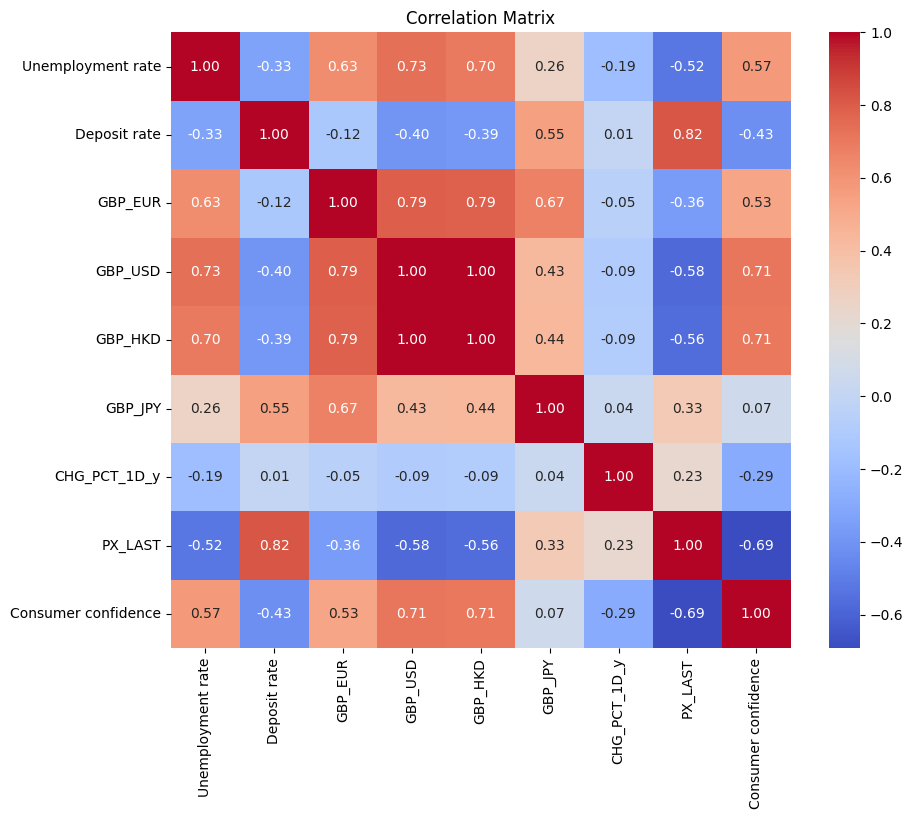

In [ ]:
# Select relevant columns for correlation
correlation_columns = ['Unemployment rate', 'Deposit rate', 'GBP_EUR', 'GBP_USD', 'GBP_HKD', 'GBP_JPY', 'CHG_PCT_1D_y' ,'PX_LAST', 'Consumer confidence']

# Compute correlation matrix
correlation_matrix = df_2[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()